# Redesigning Florence Nightingale's Rose Diagram

## The Original Graphic (1858)

![Original Graphic](image.png)

Florence Nightingale created this polar area diagram—often called the "Rose Diagram" or "Coxcomb"—to illustrate the causes of mortality among British soldiers during the Crimean War (1854–1856). Her goal was to convince military and government officials that most deaths were preventable, caused by disease rather than battle wounds.

### Reading the Original

- **Blue wedges**: Deaths from preventable diseases (cholera, typhus, dysentery)
- **Red wedges**: Deaths from battle wounds
- **Black wedges**: Deaths from all other causes

Each wedge represents one month, with the area proportional to the death count. The diagram is split into two charts: April 1854–March 1855 (right) and April 1855–March 1856 (left).

### Why Redesign?

While revolutionary for its time, the polar format has limitations:
1. **Difficult comparisons** — Areas in polar charts are harder to compare than linear bars
2. **No common baseline** — Each wedge starts from the center, making precise comparison challenging
3. **Split visualization** — The two-chart layout interrupts the timeline narrative
4. **Missing context** — Army size fluctuated significantly, affecting interpretation of raw death counts

---

## My Redesign Approach

I chose a **stacked bar chart with dual y-axes** to address these issues:

- **Stacked bars** show absolute death counts by cause, preserving Nightingale's original color scheme (blue for disease, red for wounds, grey for other)
- **Line overlay** shows death *rates* per 1,000 soldiers, accounting for army size changes
- **Linear timeline** makes month-to-month trends immediately visible
- **Single unified chart** tells the complete story without splitting the data

---

## Exploring the Data

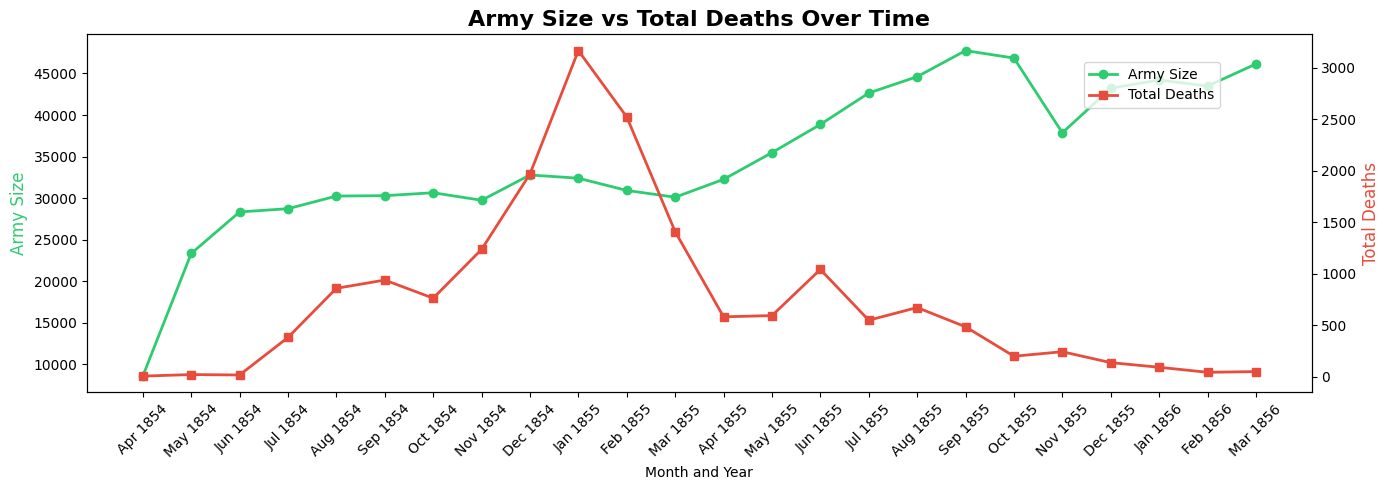

In [2]:
# Load and prepare the data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("../assignment2/data/nightingale.xlsx")
df['Date'] = pd.to_datetime(df['Date']).dt.date
df["Month_Year"] = df["Month"] + " " + df["Year"].astype(str)
df['Total Deaths'] = df['Disease'] + df['Wounds'] + df['Other']

# Plot army size vs total deaths to understand the context
fig, ax1 = plt.subplots(figsize=(14, 5))
ax1.plot(df['Month_Year'], df['Army'], 'o-', color='#2ecc71', label='Army Size', linewidth=2)
ax1.set_ylabel('Army Size', color='#2ecc71', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(df['Month_Year'], df['Total Deaths'], 's-', color='#e74c3c', label='Total Deaths', linewidth=2)
ax2.set_ylabel('Total Deaths', color='#e74c3c', fontsize=12)

ax1.set_title('Army Size vs Total Deaths Over Time', fontsize=16, fontweight='bold')
ax1.set_xlabel('Month and Year')
fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.88))
plt.tight_layout()
plt.show()

The graph above reveals crucial context missing from Nightingale's original: **army size varied dramatically** over the war. Deaths peaked in winter 1854–55 when the army was also at its largest, but the *rate* of death tells a more nuanced story.

---

## The Redesigned Visualization

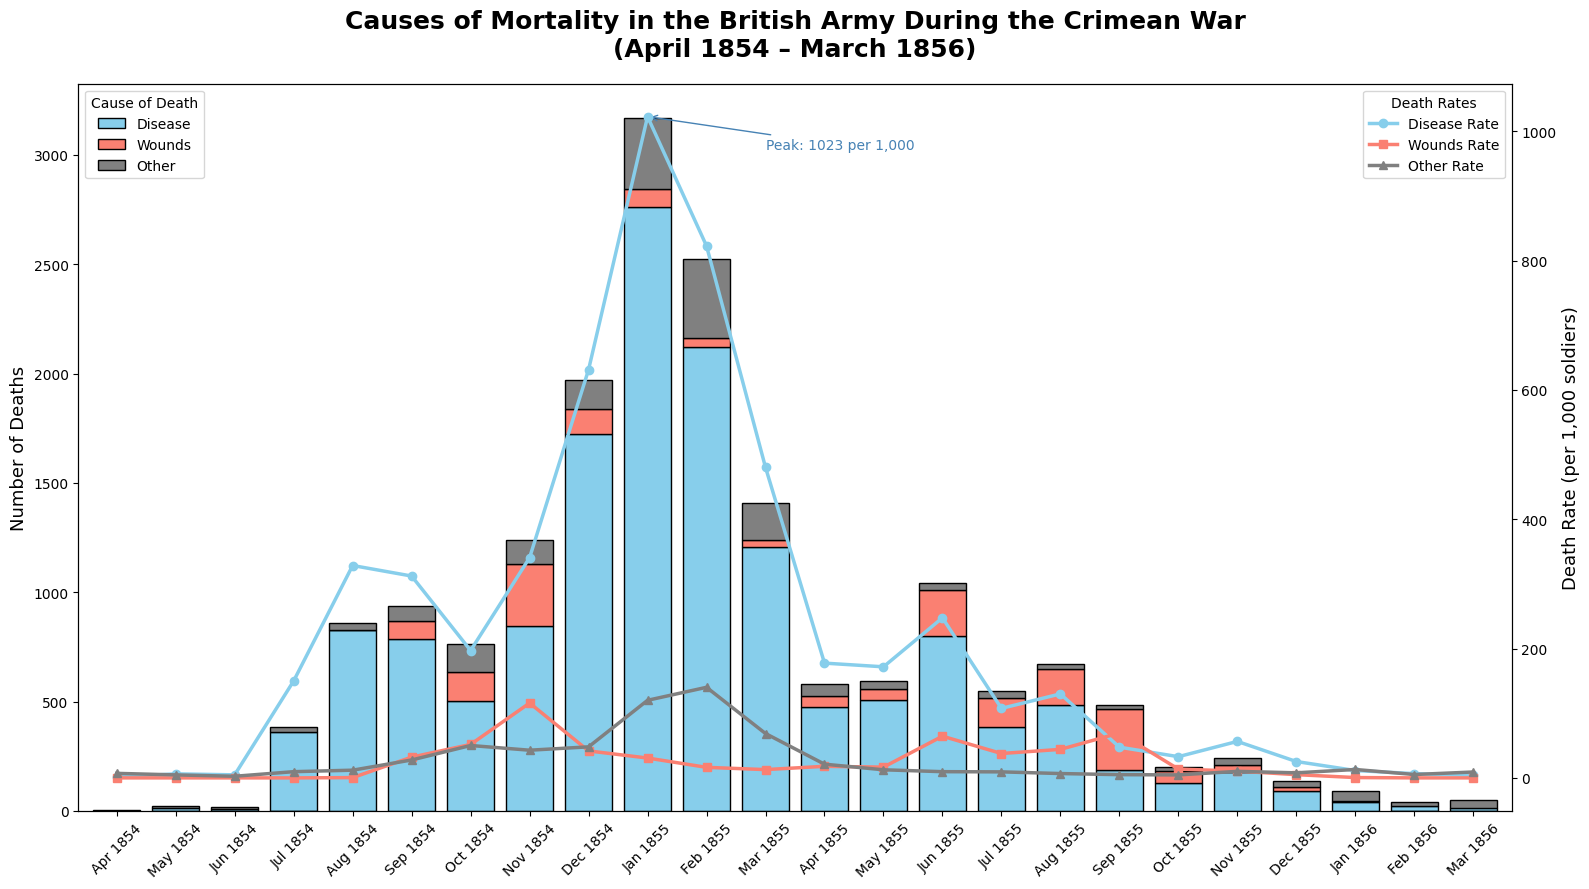

In [4]:
# Final redesigned visualization
fig, ax1 = plt.subplots(figsize=(16, 9))

# Stacked bar chart for absolute deaths - using Nightingale's original colors
bars = df.set_index("Month_Year")[["Disease", "Wounds", "Other"]].plot(
    kind="bar", stacked=True, ax=ax1,
    color=["skyblue", "salmon", "grey"],
    edgecolor="black", width=0.8
)

ax1.set_title('Causes of Mortality in the British Army During the Crimean War\n(April 1854 – March 1856)', 
              fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel('Number of Deaths', fontsize=13)
ax1.set_xlabel('', fontsize=12)
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.legend(title='Cause of Death', loc='upper left', fontsize=10)

# Secondary axis for death rates - matching bar colors
ax2 = ax1.twinx()
ax2.plot(range(len(df)), df["Disease.rate"], 'o-', color="skyblue", label="Disease Rate", 
         linewidth=2.5, markersize=6, zorder=5)
ax2.plot(range(len(df)), df['Wounds.rate'], 's-', color='salmon', label='Wounds Rate', 
         linewidth=2.5, markersize=6, zorder=5)
ax2.plot(range(len(df)), df['Other.rate'], '^-', color='grey', label='Other Rate', 
         linewidth=2.5, markersize=6, zorder=5)
ax2.set_ylabel('Death Rate (per 1,000 soldiers)', fontsize=13)
ax2.legend(title='Death Rates', loc='upper right', fontsize=10)

# Add annotation for peak
peak_month = df.loc[df['Disease.rate'].idxmax(), 'Month_Year']
peak_rate = df['Disease.rate'].max()
ax2.annotate(f'Peak: {peak_rate:.0f} per 1,000', 
             xy=(df['Disease.rate'].idxmax(), peak_rate),
             xytext=(df['Disease.rate'].idxmax() + 2, peak_rate - 50),
             fontsize=10, color='steelblue',
             arrowprops=dict(arrowstyle='->', color='steelblue'))

plt.tight_layout()
plt.show()

---

## Key Insights

The redesigned chart reveals Nightingale's core message with greater clarity:

1. **Disease dominated mortality** — The blue bars and lines dwarf all other causes throughout the war
2. **January 1855 was catastrophic** — Disease deaths peaked at over 1,000 soldiers in a single month, with a rate exceeding 1,000 per 1,000 (meaning the equivalent of the entire army died from disease that month)
3. **Sanitation reforms worked** — After Nightingale's sanitary improvements in spring 1855, disease death rates plummeted dramatically
4. **Battle wounds were secondary** — Despite being a war, combat injuries (red) caused far fewer deaths than preventable disease

Nightingale's advocacy for improved sanitation, clean water, and proper ventilation in military hospitals saved countless lives—a message this redesign aims to communicate even more powerfully than the original.